# Overview:

1. **Import Required Libraries**: The code starts by importing necessary libraries such as NumPy, pandas, Matplotlib, and ttest_ind function from scipy.stats.

2. **Load Gene Expression Data**: It loads gene expression data from a tab-separated file into a pandas DataFrame. The index column is specified as 0, indicating that the first column contains row labels.

3. **Extract Control and Treatment Groups**: It identifies control and treatment groups by filtering columns whose names start with 'CTRL' and 'SWTX143', respectively.

4. **Calculate Mean Expression**: It calculates the mean expression for each gene across control and treatment groups.

5. **Calculate Log2 Fold Change**: It computes the log2 fold change by taking the log2 ratio of treatment mean expression to control mean expression.

6. **Calculate p-values using t-test**: It performs a t-test for each gene to calculate the p-value, assuming unequal variances between control and treatment groups.

7. **Add Log2 Fold Change and p-values to DataFrame**: It adds the computed log2 fold change and p-values to the DataFrame for further analysis.

8. **Define Thresholds for Regulation and Significance**: It defines thresholds for fold change and p-value to identify differentially expressed genes.

9. **Identify Differentially Expressed Genes**: It identifies genes that are significantly upregulated, downregulated, or show no significant change based on the defined thresholds.

10. **Create Volcano Plot**: It generates a volcano plot to visualize the log2 fold change versus the negative logarithm of p-values. Genes are color-coded based on their regulation and significance levels.

11. **Annotate a Random Gene**: For demonstration, we've annotated a random gene of choice in the dataset. But you can probably try to annotate significantly upregulated and downregulated genes.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load gene expression data
gene_expression_df = pd.read_csv('data.txt', sep='\t', index_col=0)

gene_expression_df.head(4)

In [ ]:
gene_expression_df.head(4)

In [3]:
gene_expression_df.shape

(27064, 8)

In [4]:
for each_col in gene_expression_df.columns:
  print(each_col)

CTRL_4H
CTRL_24H
SWTX143_50mpk_4h
SWTX143_50mpk_24h
SWTX143_25mpk_4h
SWTX143_25mpk_24h
SWTX143_10mpk_4h
SWTX143_10mpk_24h


In [5]:
# Extract control and treatment groups
control_groups = gene_expression_df.columns.str.startswith('CTRL')
treatment_groups = gene_expression_df.columns.str.startswith('SWTX143')

# Calculate mean expression
control_mean = gene_expression_df.loc[:, control_groups].mean(axis=1)
treatment_mean = gene_expression_df.loc[:, treatment_groups].mean(axis=1)

# Calculate log2 fold change
log2_fold_change = np.log2(treatment_mean / control_mean)

# Calculate p-values using t-test
p_values = [ttest_ind(gene_expression_df.loc[gene, control_groups].values,
                      gene_expression_df.loc[gene, treatment_groups].values,
                      equal_var=False)[1] for gene in gene_expression_df.index]

# Add log2 fold change and p-values to the dataframe
gene_expression_df['log2_fold_change'] = log2_fold_change
gene_expression_df['p-value'] = p_values

gene_expression_df.tail(4)

/home/pallawi/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,CTRL_4H,CTRL_24H,SWTX143_50mpk_4h,SWTX143_50mpk_24h,SWTX143_25mpk_4h,SWTX143_25mpk_24h,SWTX143_10mpk_4h,SWTX143_10mpk_24h,log2_fold_change,p-value
Unnamed: 0,,,,,,,,,,
DHX57,0.002289,0.002450,0.003254,0.003117,0.002958,0.002891,0.003262,0.002456,0.335232,0.007386
LTV1,0.003104,0.002443,0.003248,0.002671,0.002831,0.003049,0.003148,0.003197,0.124672,0.584634
HLA-H,0.001914,0.001910,0.002746,0.002552,0.003389,0.002204,0.001920,0.001358,0.304476,0.177953
LONRF1,0.001404,0.001500,0.001198,0.001140,0.001539,0.001511,0.001865,0.001374,-0.014207,0.907973


In [6]:
gene_expression_df.shape

(27064, 10)

In [7]:
# Define thresholds for regulation and significance
fold_change_threshold, p_value_threshold = 1, 0.05

# Identify differentially expressed genes
upregulated = gene_expression_df[(gene_expression_df['log2_fold_change'] > fold_change_threshold) & (gene_expression_df['p-value'] < p_value_threshold)]
downregulated = gene_expression_df[(gene_expression_df['log2_fold_change'] < -fold_change_threshold) & (gene_expression_df['p-value'] < p_value_threshold)]
no_change = gene_expression_df[abs(gene_expression_df['log2_fold_change']) <= fold_change_threshold]

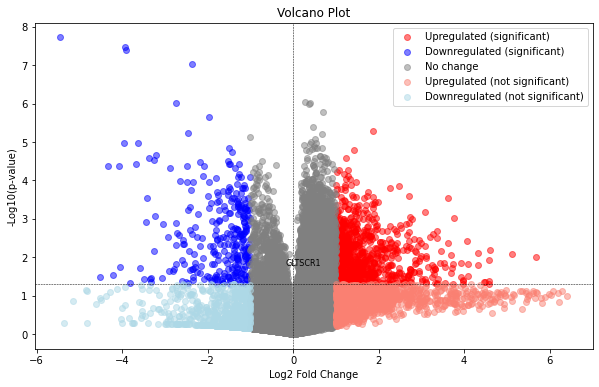

In [8]:
import random

# Create volcano plot
plt.figure(figsize=(10, 6))

# Plot genes with significant upregulation
plt.scatter(upregulated['log2_fold_change'], -np.log10(upregulated['p-value']), color='red', label='Upregulated (significant)', alpha=0.5)

# Plot genes with significant downregulation
plt.scatter(downregulated['log2_fold_change'], -np.log10(downregulated['p-value']), color='blue', label='Downregulated (significant)', alpha=0.5)

# Plot genes with no significant change
plt.scatter(no_change['log2_fold_change'], -np.log10(no_change['p-value']), color='gray', label='No change', alpha=0.5)

# Plot genes with upregulation but not significant
plt.scatter(gene_expression_df[(gene_expression_df['log2_fold_change'] > fold_change_threshold) & (gene_expression_df['p-value'] >= p_value_threshold)]['log2_fold_change'],
            -np.log10(gene_expression_df[(gene_expression_df['log2_fold_change'] > fold_change_threshold) & (gene_expression_df['p-value'] >= p_value_threshold)]['p-value']),
            color='salmon', label='Upregulated (not significant)', alpha=0.5)

# Plot genes with downregulation but not significant
plt.scatter(gene_expression_df[(gene_expression_df['log2_fold_change'] < -fold_change_threshold) & (gene_expression_df['p-value'] >= p_value_threshold)]['log2_fold_change'],
            -np.log10(gene_expression_df[(gene_expression_df['log2_fold_change'] < -fold_change_threshold) & (gene_expression_df['p-value'] >= p_value_threshold)]['p-value']),
            color='lightblue', label='Downregulated (not significant)', alpha=0.5)

# Choose a random gene for annotation
random_gene = random.choice(gene_expression_df.index)

# Check if the gene exists in the data
if random_gene in gene_expression_df.index:
    gene_data = gene_expression_df.loc[random_gene]
    if np.isfinite(gene_data['log2_fold_change']) and np.isfinite(-np.log10(gene_data['p-value'])):
        x_coord = gene_data['log2_fold_change']
        y_coord = -np.log10(gene_data['p-value'])
        plt.annotate(random_gene, (x_coord, y_coord), textcoords="offset points", xytext=(0,20), ha='center', fontsize=8, color='black', zorder=10)
else:
    print("Gene not found in data:", random_gene)

plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10(p-value)')
plt.title('Volcano Plot')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)
plt.axhline(y=-np.log10(0.05), color='black', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


In [9]:
pip install pydeseq2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 20.5 MB/s eta 0:00:00m eta 0:00:010:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 24.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 kB 29.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import pandas as pd

# Load gene expression data
df = pd.read_csv('data_4hr.txt', sep='\t', index_col=0)

df.head(4)

,CTRL_4h_1,CTRL_4h_2,CTRL_4h_3,SWTX143_50mpk_4h_1,SWTX143_50mpk_4h_2,SWTX143_50mpk_4h_3
Gene_names,,,,,,
DDX11L1,1,0,0,0,0,0
WASH7P,54,103,71,83,61,59
MIR6859-1,0,0,0,0,0,0
MIR6859-2,0,0,0,0,0,0


In [3]:
#get rid of columns have zero counts
df2 = df[df.sum(axis = 1) > 0]
#df.shape (27064, 8)
#df2.shape (21719, 8)
df2

,CTRL_4h_1,CTRL_4h_2,CTRL_4h_3,SWTX143_50mpk_4h_1,SWTX143_50mpk_4h_2,SWTX143_50mpk_4h_3
Gene_names,,,,,,
DDX11L1,1,0,0,0,0,0
WASH7P,54,103,71,83,61,59
LOC729737,24,55,32,42,31,32
LOC100133331,44,70,51,37,39,47
MIR6723,32,73,63,56,70,53
...,...,...,...,...,...,...
MTHFD2L,5,23,14,16,7,8
DHX57,132,169,157,165,137,146
LTV1,189,238,195,167,123,157


In [4]:
df2 = df2.T
df2

Gene_names,DDX11L1,WASH7P,LOC729737,LOC100133331,MIR6723,LOC100288069,FAM87B,LINC00115,LINC01128,FAM41C,...,PYCRL,CRYGS,VSIG2,ASIC4,NRTN,MTHFD2L,DHX57,LTV1,HLA-H,LONRF1
CTRL_4h_1,1,54,24,44,32,26,1,5,48,0,...,62,3,0,9,1,5,132,189,75,60
CTRL_4h_2,0,103,55,70,73,17,4,12,45,0,...,99,11,0,12,9,23,169,238,130,141
CTRL_4h_3,0,71,32,51,63,24,0,11,48,0,...,73,6,0,12,4,14,157,195,180,92
SWTX143_50mpk_4h_1,0,83,42,37,56,31,1,10,23,0,...,76,14,0,12,5,16,165,167,145,53
SWTX143_50mpk_4h_2,0,61,31,39,70,31,1,6,17,1,...,93,6,0,14,8,7,137,123,115,58
SWTX143_50mpk_4h_3,0,59,32,47,53,24,2,3,25,0,...,68,4,1,22,8,8,146,157,119,53


In [5]:
metadata = pd.DataFrame(zip(df2.index, ['C','C','C','T50mpk4','T50mpk4','T50mpk4']),
                        columns = ['Sample', 'Condition'])
metadata

,Sample,Condition
0,CTRL_4h_1,C
1,CTRL_4h_2,C
2,CTRL_4h_3,C
3,SWTX143_50mpk_4h_1,T50mpk4
4,SWTX143_50mpk_4h_2,T50mpk4
5,SWTX143_50mpk_4h_3,T50mpk4


In [6]:
metadata = metadata.set_index('Sample')
metadata

,Condition
Sample,
CTRL_4h_1,C
CTRL_4h_2,C
CTRL_4h_3,C
SWTX143_50mpk_4h_1,T50mpk4
SWTX143_50mpk_4h_2,T50mpk4
SWTX143_50mpk_4h_3,T50mpk4


In [8]:
dds = DeseqDataSet(counts=df2,
                   metadata=metadata,
                   design_factors="Condition")
dds

AnnData object with n_obs × n_vars = 6 × 20152
    obs: 'Condition'
    obsm: 'design_matrix'

In [9]:
dds.deseq2()

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 3.01 seconds.

Fitting dispersion trend curve...
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 3.56 seconds.

Fitting LFCs...
... done in 2.33 seconds.

Replacing 0 outlier genes.



In [10]:
dds

AnnData object with n_obs × n_vars = 6 × 20152
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [11]:
res = DeseqStats(dds, contrast = ('Condition','T50mpk4','C'))

In [12]:
res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Condition T50mpk4 vs C
                baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Gene_names                                                               
DDX11L1         0.194486       -0.710333  4.427840 -0.160424  0.872547   
WASH7P         70.067120        0.116603  0.248702  0.468848  0.639178   
LOC729737      35.005571        0.219093  0.342359  0.639950  0.522205   
LOC100133331   47.052436       -0.141168  0.297145 -0.475082  0.634729   
MIR6723        56.949205        0.395019  0.288825  1.367673  0.171415   
...                  ...             ...       ...       ...       ...   
MTHFD2L        11.357472       -0.108384  0.625521 -0.173270  0.862439   
DHX57         150.508640        0.225216  0.183058  1.230296  0.218586   
LTV1          175.467300       -0.223523  0.190465 -1.173570  0.240567   
HLA-H         125.544451        0.254641  0.252422  1.008794  0.313073   
LONRF1         72.236268       -0.526026  0.258935 

... done in 1.11 seconds.



In [46]:
res_1 = res.results_df
res_1['Symbol'] = res_1.index
res_1

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Gene_names,,,,,,,
DDX11L1,0.194486,-0.710333,4.427840,-0.160424,0.872547,NaN,DDX11L1
WASH7P,70.067120,0.116603,0.248702,0.468848,0.639178,0.813896,WASH7P
LOC729737,35.005571,0.219093,0.342359,0.639950,0.522205,0.733004,LOC729737
LOC100133331,47.052436,-0.141168,0.297145,-0.475082,0.634729,0.811219,LOC100133331
MIR6723,56.949205,0.395019,0.288825,1.367673,0.171415,0.381605,MIR6723
...,...,...,...,...,...,...,...
MTHFD2L,11.357472,-0.108384,0.625521,-0.173270,0.862439,0.936396,MTHFD2L
DHX57,150.508640,0.225216,0.183058,1.230296,0.218586,0.444473,DHX57
LTV1,175.467300,-0.223523,0.190465,-1.173570,0.240567,0.470059,LTV1


In [47]:
res_1 = res_1[res_1.baseMean >= 10]
res_1

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Gene_names,,,,,,,
WASH7P,70.067120,0.116603,0.248702,0.468848,0.639178,0.813896,WASH7P
LOC729737,35.005571,0.219093,0.342359,0.639950,0.522205,0.733004,LOC729737
LOC100133331,47.052436,-0.141168,0.297145,-0.475082,0.634729,0.811219,LOC100133331
MIR6723,56.949205,0.395019,0.288825,1.367673,0.171415,0.381605,MIR6723
LOC100288069,26.222860,0.569068,0.426018,1.335785,0.181620,0.396072,LOC100288069
...,...,...,...,...,...,...,...
MTHFD2L,11.357472,-0.108384,0.625521,-0.173270,0.862439,0.936396,MTHFD2L
DHX57,150.508640,0.225216,0.183058,1.230296,0.218586,0.444473,DHX57
LTV1,175.467300,-0.223523,0.190465,-1.173570,0.240567,0.470059,LTV1


In [48]:
#%pip install sanbomics


	• 	GeneName—Gene name for gene level results or transcript ID for transcript level results.
	• 	baseMean—The average of the normalized count values, dividing by size factors, taken over all samples.
	• 	log2FoldChange–The effect size estimate. This value indicates how much the gene or transcript's expression seems to have changed between the comparison and control groups. This value is reported on a logarithmic scale to base 2.
	• 	lfcSE–The standard error estimate for the log2 fold change estimate.
	• 	stat–The value of the test statistic for the gene or transcript.
	• 	pvalue–P-value of the test for the gene or transcript.
	• 	padj–Adjusted P-value for multiple testing for the gene or transcript.
	• 	status–Low if baseMean is less than or equal to filterThreshold calculated by DESeq2 for the gene or transcript. OK for all the other genes or transcripts.
	• 	control–Expression of the control group back-calculated from baseMean and log2FoldChange. NA if log2FoldChange is not available.
	• 	comparison–Expression of the comparison group back–calculated from baseMean and log2FoldChange. NA if log2FoldChange is not available.


In [15]:
sign = res_1[(res_1.padj < 0.05) & (abs(res_1.log2FoldChange > 0.5))]

In [50]:
ranking = res_1[['Symbol', 'stat']].dropna().sort_values('stat', ascending = False)
ranking

,Symbol,stat
Gene_names,,
ITLN1,ITLN1,28.814940
SPRR2F,SPRR2F,19.894657
ITLN2,ITLN2,16.711747
CA11,CA11,14.609048
NPNT,NPNT,12.408871
...,...,...
SLCO2A1,SLCO2A1,-15.946630
DYSF,DYSF,-15.948156
COL4A2,COL4A2,-16.257905


In [65]:
#remove duplicates
ranking = ranking.drop_duplicates('Symbol')
ranking

,Symbol,stat
Gene_names,,
ITLN1,ITLN1,28.814940
SPRR2F,SPRR2F,19.894657
ITLN2,ITLN2,16.711747
CA11,CA11,14.609048
NPNT,NPNT,12.408871
...,...,...
SLCO2A1,SLCO2A1,-15.946630
DYSF,DYSF,-15.948156
COL4A2,COL4A2,-16.257905


In [57]:
%pip install gseapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.7 MB/s eta 0:00:0031m22.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [84]:
#run GSEA on dataframe
import gseapy as gp
from gseapy.plot import gseaplot
manual_set = {'things':['SLC7A5', 'COL4A2','CA11']}
#create pre_res object
pre_res = gp.prerank(rnk = ranking,
          gene_sets = ['GO_Biological_Process_2021', manual_set],
          seed = 6, permutation_num = 100)

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [87]:
import gseapy as gp
from gseapy.plot import gseaplot

# Define your manual gene set correctly
#manual_set = {'GeneSet1': ['ITLN1', 'SPRR2F', 'ITLN2', 'CA11', 'NPNT']}
manual_set = ['ITLN1', 'SPRR2F', 'ITLN2', 'CA11', 'NPNT']
# Create pre_res object
pre_res = gp.prerank(rnk=ranking,
                     gene_sets=['GO_Biological_Process_2021', manual_set],
                     seed=6, permutation_num=100)


ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [92]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(gene_list=manual_set, # or "./tests/data/gene_list.txt",
                 gene_sets=['GO_Biological_Process_2021'],
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

In [99]:
enr.results.head(1)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,cell-cell adhesion mediated by integrin (GO:00...,1/5,0.001249,0.024384,0,0,1249.4375,8352.531058,NPNT


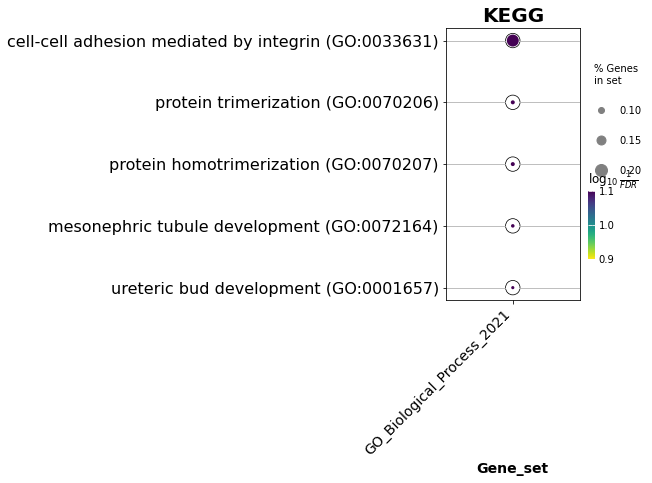

In [100]:
# categorical scatterplot
ax = dotplot(enr.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              title = "KEGG",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

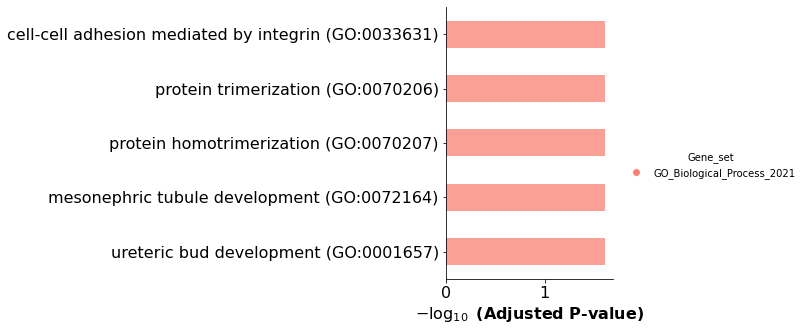

In [101]:
# categorical scatterplot
ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              #color=['darkred', 'darkblue'] # set colors for group
              color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )



In [94]:
out = []

for term in list(enr.results):
    out.append([term,
               enr.results[term]['Adjusted P-value'],
               enr.results[term]['es'],
               enr.results[term]['nes']])
    
out_df = pd.DataFrame(out, columns = ['Term', 'fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df

KeyError: 'fdr'

In [88]:
manual_set

['ITLN1', 'SPRR2F', 'ITLN2', 'CA11', 'NPNT']

In [75]:
import pandas as pd
import gseapy as gp

# Check the format of the 'ranking' DataFrame
print("Shape of 'ranking' DataFrame:", ranking.shape)
print("Columns of 'ranking' DataFrame:", ranking.columns)

# Check the format of the 'manual_set' dictionary
print("Keys of 'manual_set' dictionary:", manual_set.keys())
print("Values of 'manual_set' dictionary:", manual_set.values())




Shape of 'ranking' DataFrame: (13400, 2)
Columns of 'ranking' DataFrame: Index(['Symbol', 'stat'], dtype='object')
Keys of 'manual_set' dictionary: dict_keys(['GeneSet1'])
Values of 'manual_set' dictionary: dict_values([['ITLN1', 'SPRR2F', 'ITLN2', 'CA11', 'NPNT']])


In [76]:
# Create pre_res object
pre_res = gp.prerank(rnk=ranking,
                     gene_sets=['GO_Biological_Process_2021', manual_set],
                     seed=6, permutation_num=100)

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [72]:
help(gp.prerank)

Help on function prerank in module gseapy:

prerank(rnk: Union[pandas.core.frame.DataFrame, pandas.core.series.Series, str], gene_sets: Union[List[str], str, Dict[str, str]], outdir: Optional[str] = None, pheno_pos: str = 'Pos', pheno_neg: str = 'Neg', min_size: int = 15, max_size: int = 500, permutation_num: int = 1000, weight: float = 1.0, ascending: bool = False, threads: int = 4, figsize: Tuple[float, float] = (6.5, 6), format: str = 'pdf', graph_num: int = 20, no_plot: bool = False, seed: int = 123, verbose: bool = False, *arg, **kwargs) -> gseapy.gsea.Prerank
    Run Gene Set Enrichment Analysis with pre-ranked correlation defined by user.
    
    :param rnk: pre-ranked correlation table or pandas DataFrame. Same input with ``GSEA`` .rnk file.
    
    :param gene_sets: Enrichr Library name or .gmt gene sets file or dict of gene sets. Same input with GSEA.
    
    :param outdir: results output directory. If None, nothing will write to disk.
    
    :param int permutation_num: 

In [17]:
#pip install scanpy
#import scanpy as sc
#sc.tl.pca(dds,color='Condition',size=200)

TypeError: pca() got an unexpected keyword argument 'color'

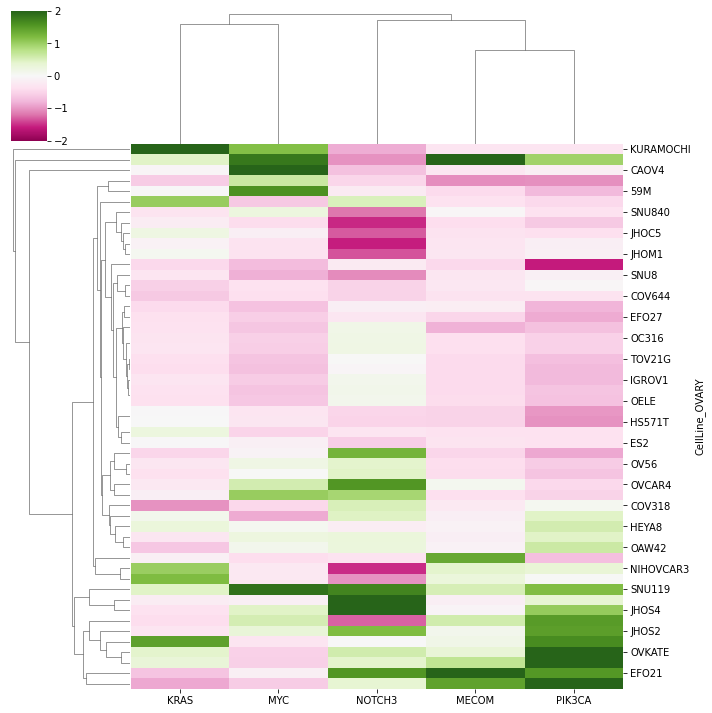

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

np.random.seed(2)
data = pd.read_csv('heatmap.csv', sep='\t', index_col=0)
#z_data = stats.zscore(data)
z_data = data.apply(stats.zscore)
#https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
#sns.heatmap(z_data, vmin=-2, vmax=2, cmap="PiYG")
#https://www.tutorialspoint.com/hierarchically-clustered-heatmap-in-python-with-seaborn-clustermap
heat_data = sns.clustermap(z_data, vmin=-2, vmax=2, cmap="PiYG")
plt.savefig('heatmap2_conf.png', dpi=400)
#heat_data.savefig('heatmap_conf.png', dpi=600)
#z_data
plt.show()